In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')
# import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#RUN FOR PREDICT STEP 1
sampledf = pd.read_csv("/content/drive/My Drive/sample_submission.csv") 
testdf = pd.read_csv("/content/drive/My Drive/test.csv") 
traindf = pd.read_csv("/content/drive/My Drive/train.csv") 

In [ ]:
#DO NOT RUN FOR PREDICT THESE LINES FOR DATA ANALYSIS
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['model','fuelType','transmission','brand',
       'mileage','mpg','engineSize','tax']

for c in cols:
    le.fit(list(traindf[c].values))
    traindf[c] = le.transform(list(traindf[c].values))
    


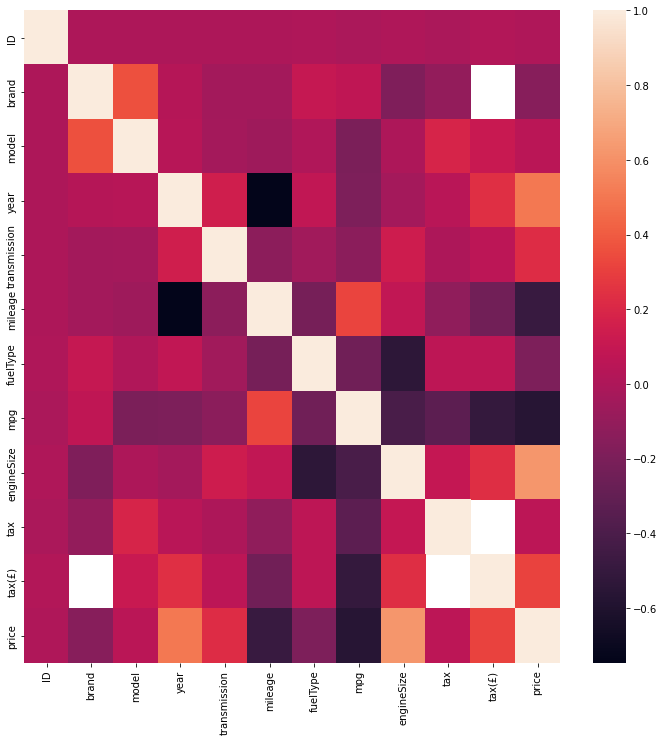

In [ ]:
#DO NOT RUN FOR PREDICT THESE LINES FOR DATA ANALYSIS

plt.figure(figsize=(12, 12))
sns.heatmap(traindf.corr());

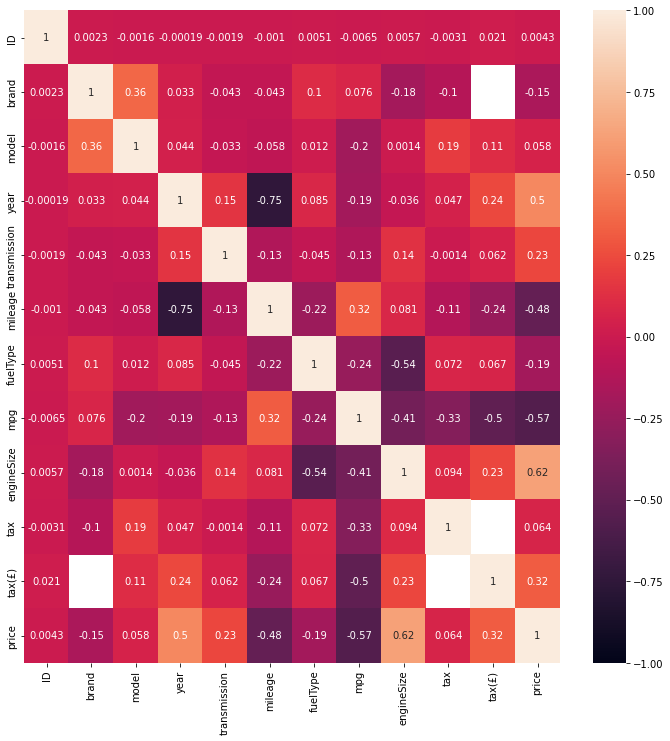

In [ ]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(traindf.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
traindf.max()

ID             59999.0
year            2020.0
mileage       323003.0
mpg              470.8
engineSize         6.6
tax              580.0
tax(£)           555.0
price         159999.0
dtype: float64

In [ ]:
traindf.max()

In [ ]:
#RUN FOR PREDICT STEP 2
traindf['age'] = 2021 - traindf['year']
testdf['age'] = 2021 - testdf['year']
traindf['mil']= 400000 -traindf['mileage']
testdf['mil']= 400000 -testdf['mileage']
traindf['fuel']= 500 -traindf['mpg']
testdf['fuel']= 500 -testdf['mpg']

In [ ]:
#RUN FOR PREDICT STEP 3
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['model','fuelType','transmission','brand',
       'mileage','mpg','engineSize','tax','mil','age','fuel']

for c in cols:
    le.fit(list(traindf[c].values))
    traindf[c] = le.transform(list(traindf[c].values))
    


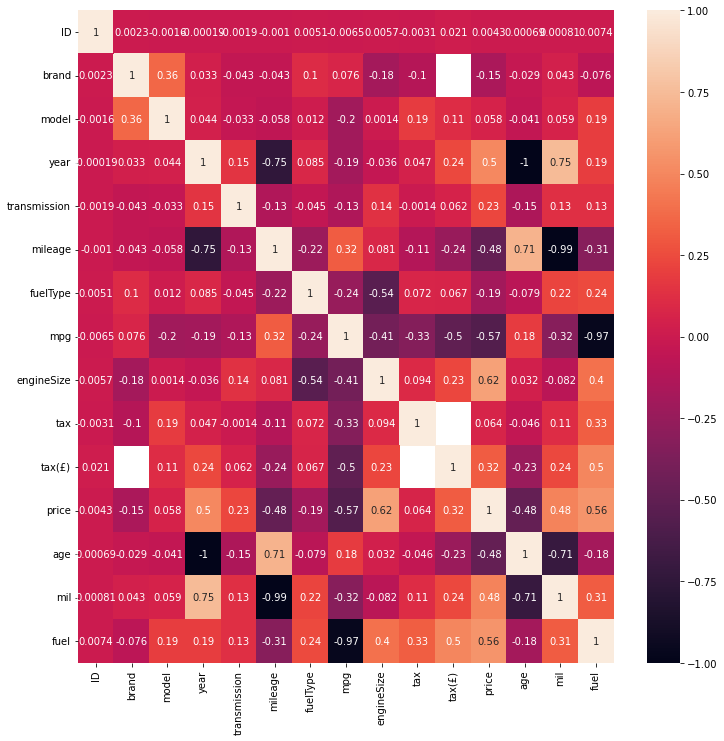

In [ ]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(traindf.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
traindf.max()

ID             59999.0
year            2020.0
mileage       323003.0
mpg              470.8
engineSize         6.6
tax              580.0
tax(£)           555.0
price         159999.0
age               51.0
mil           399998.0
fuel             498.9
dtype: float64

In [ ]:
#RUN FOR PREDICT STEP 4
X_train = traindf.drop(['price'], axis='columns')
y_train = traindf['price']
test=testdf

In [ ]:
#RUN FOR PREDICT STEP 4
cols_for_none = ('model','brand','fuelType')
for c in cols_for_none:
    X_train[c] = X_train[c].fillna("None") 
    test[c] = test[c].fillna("None")

In [ ]:
#RUN FOR PREDICT STEP 4
cols_for_zero = ('age','mileage','mpg','tax','tax(£)','mil','fuel')
for c in cols_for_zero:
    X_train[c] = X_train[c].fillna(0.0)
    test[c] = test[c].fillna(0.0) 

In [ ]:
#RUN FOR PREDICT STEP 4
cols_for_mode = ('engineSize','transmission')
for c in cols_for_mode:
    X_train[c] = X_train[c].fillna(X_train[c].mode())
    test[c] = test[c].fillna(test[c].mode())

In [ ]:
traindf.mode()
# for analysis

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price,age,mil,fuel
0,0,ford,Fiesta,2019.0,Manual,18.0,Petrol,60.1,2.0,145.0,145.0,9995.0,2.0,399982.0,439.9
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,59996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,59997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,59998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#RUN FOR PREDICT STEP 5
#	ID	brand	  model	   year	    transmission	  mileage	  fuelType	mpg	  engineSize	tax	  tax(£)	price	  age	  mil	      fuel
# 0	  ford  	Fiesta	2019.0	  Manual	        18.0	    Petrol	  60.1	2.0	        145.0	145.0	  9995.0	2.0	  399982.0	439.9
X_train['engineSize'] = X_train['engineSize'].fillna(2.0)
X_train['transmission'] = X_train['transmission'].fillna('Manual')

test['engineSize'] = test['engineSize'].fillna(2.0)
test['transmission'] = test['transmission'].fillna('Manual')

In [ ]:
#RUN FOR PREDICT STEP 6
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['model','fuelType','transmission','brand',
       'mileage','mpg','engineSize','tax','mil','age','fuel']

for c in cols:
    le.fit(list(traindf[c].values))
    traindf[c] = le.transform(list(traindf[c].values))
for c in cols:
    le.fit(list(test[c].values))
    test[c] = le.transform(list(test[c].values)) 
    


In [ ]:
#DO NOT RUN FOR PREDICT THESE LINES FOR DATA ANALYSIS

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['model','fuelType','transmission','brand',
        'age','mileage','mpg','engineSize','tax']

for c in cols:
    le.fit(list(X_train[c].values))
    X_train[c] = le.transform(list(X_train[c].values))
    
for c in cols:
    le.fit(list(test[c].values))
    test[c] = le.transform(list(test[c].values)) 


In [ ]:
#RUN FOR PREDICT STEP 7
X_train.drop('year', inplace=True, axis=1)
test.drop('year', inplace=True, axis=1)
X_train.drop('tax(£)', inplace=True, axis=1)
test.drop('tax(£)', inplace=True, axis=1)
X_train.drop('ID', inplace=True, axis=1)
test.drop('ID', inplace=True, axis=1)

In [ ]:
X_train.info()
test.info()
# TO CHECK NULLS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         60000 non-null  int64  
 1   model         60000 non-null  int64  
 2   transmission  60000 non-null  int64  
 3   mileage       60000 non-null  int64  
 4   fuelType      60000 non-null  int64  
 5   mpg           60000 non-null  int64  
 6   engineSize    60000 non-null  int64  
 7   tax           60000 non-null  int64  
 8   age           60000 non-null  int64  
 9   mil           60000 non-null  float64
 10  fuel          60000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 5.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25555 entries, 0 to 25554
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   brand         25555 non-null  int64
 1   model         25555 non-null  int64
 2   tran

In [ ]:
# TO CHECK DATA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#Show the important attributes in descending order
best_features = SelectKBest(score_func=f_regression, k=11)
top_features = best_features.fit(X_train,y_train)
scores = pd.DataFrame(top_features.scores_)
columns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features','Scores']
print(featureScores.nlargest(11, 'Scores'))

        Features        Scores
6     engineSize  38891.649594
5            mpg  27439.850078
8            age  20410.437209
3        mileage  18026.146259
9            mil   9679.414263
7            tax   7031.827084
10          fuel   4320.785326
2   transmission   3313.263383
4       fuelType   2310.403806
0          brand   1183.517122
1          model    199.832937


In [ ]:
#RUN FOR PREDICT STEP 8
X_train.drop('year', inplace=True, axis=1)
test.drop('year', inplace=True, axis=1)
X_train.drop('tax(£)', inplace=True, axis=1)
test.drop('tax(£)', inplace=True, axis=1)
X_train.drop('ID', inplace=True, axis=1)
test.drop('ID', inplace=True, axis=1)
X_train.drop('fuel', inplace=True, axis=1)
test.drop('fuel', inplace=True, axis=1)
X_train.drop('mil', inplace=True, axis=1)
test.drop('mil', inplace=True, axis=1)


In [ ]:
X_train.info()
test.info()
#to check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   brand         60000 non-null  int64
 1   model         60000 non-null  int64
 2   transmission  60000 non-null  int64
 3   mileage       60000 non-null  int64
 4   fuelType      60000 non-null  int64
 5   mpg           60000 non-null  int64
 6   engineSize    60000 non-null  int64
 7   tax           60000 non-null  int64
 8   age           60000 non-null  int64
dtypes: int64(9)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25555 entries, 0 to 25554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   brand         25555 non-null  int64
 1   model         25555 non-null  int64
 2   transmission  25555 non-null  int64
 3   mileage       25555 non-null  int64
 4   fuelType      25555 non-null  int64
 5   mpg

In [ ]:
# TO DECIDE REGRESSION MODEL
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
rr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = xgb.XGBRegressor()
#Create function to displaying scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
#Training the Random Forest Regressor
print("Random Forest Regressor Scores")
scores = cross_val_score(rr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
random_forest_scores = np.sqrt(-scores)
display_scores(random_forest_scores)
print("\n")
#Training the Gradient Boosting Regressor
print('Gradient Boosting Regressor Scores')
scores = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
gradient_boosting_regressor = np.sqrt(-scores)
display_scores(gradient_boosting_regressor)
print("\n")
#Training the Linear Regression
print('Linear Regression Scores')
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
linear_regression = np.sqrt(-scores)
display_scores(linear_regression)
print("\n")
#Training the Extreme Gradient Boosting
print("xGB Scores")
scores = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
xgb_regressor = np.sqrt(-scores)
display_scores(xgb_regressor)

Random Forest Regressor Scores
Scores:  [2030.31566156 2366.54993635 2164.8431763  2168.24836695 2376.24727474]
Mean:  2221.240883180341
Standard Deviation:  132.35033111125378


Gradient Boosting Regressor Scores
Scores:  [3084.22683719 3318.81931998 3177.96369999 3237.18535525 3241.15762598]
Mean:  3211.8705676790496
Standard Deviation:  77.94767922181897


Linear Regression Scores
Scores:  [4878.94871586 5310.71212066 5218.92228387 5105.09291254 5114.15859536]
Mean:  5125.566925658908
Standard Deviation:  144.4741103167083


xGB Scores
[18:52:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:li

In [ ]:
import requests, io 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators = 50, random_state = 5)

model.fit(X_train, y_train)

y = model.predict(X_train)
rmse = float(format(np.sqrt(mean_squared_error(y_train, y)), '.3f'))
print("\nRMSE: ", rmse)
#TO IMPROVE MODEL


RMSE:  831.297


In [ ]:
#RUN FOR PREDICT STEP 9
model = RandomForestRegressor(n_estimators = 50, random_state = 5)
model.fit(X_train, y_train)
result = model.predict(test)

In [ ]:
print(result)

[18923.18 26054.84 14597.54 ... 33144.24 13050.16 21620.06]


In [ ]:
#RUN FOR PREDICT STEP 10
compare = pd.DataFrame()
compare['pri'] = result


In [ ]:
#RUN FOR PREDICT STEP 11
compare.head()

,y_predict
0,21450.909091
1,21502.727273
2,15042.000000
3,19044.090909
4,18029.181818


In [ ]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25555 entries, 0 to 25554
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_predict  25555 non-null  float64
dtypes: float64(1)
memory usage: 199.8 KB


In [ ]:
#RUN FOR PREDICT STEP 12
compare = pd.DataFrame()
compare['price'] = result

In [ ]:
#RUN FOR PREDICT STEP 13
compare.to_csv('sample4.csv')
from google.colab import files
files.download("sample4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>